# Probability of market going up next day

### Wouldn't it be nice if we could predict with some degree of probability whether the stock market is going to go up tomorrow?

In [1]:
### Business question and domain knowledge_ Explicamos
### Se trata de poder predecir la probabilidad que tenemos de que al día siguiente el mercado (índice S&P500) suba teniendo en cuenta los ciertos datos obtenidos hoy (features)

## Attributes
1. **DATE**
2. **ES = S&P 500**: The index is based on the market capitalization of 500 large companies that own shares listed on the NYSE or NASDAQ, capturing approximately 80% of all market capitalization in the United States.


**Moving average (MA)** is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. A moving average helps cut down the amount of noise on a price chart. Look at the direction of the moving average to get a basic idea of which way the price is moving. 

A moving average can also act as support or resistance. In an uptrend a **200-day moving average** may act as a support level. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend, a moving average may act as resistance; like a ceiling, the price hits the level and then starts to drop again.

3. **AVG(5)[1]**: A five-day moving average.
4. **AVG(200)[1]**: A 200-day moving average.


5. **RSI(2)[1]**
6. **VIX[1]**
7. **EUR-USD[1]**
8. **10YR_IR[1]**
9. **CRUDE OIL[1]**
10. **NG[1]**
11. **GOLD[1]**
12. **Change AVG(5)** 
13. **C - AVG(200)**

14. **RSI(2)**: The relative strength index (RSI) is a technical indicator used in the analysis of financial markets. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period. 

15. **VIX**: : The VIX, also known as the “fear indicator”, is a volatility index to quantify market expectations regarding volatility.

16. **Change VIX**
17. **Change EUR-USD**
18. **Change 10YR_IR**
19. **Change CRUDE OIL**
20. **Change NG**
21. **Change GOLD**
22. **S&P500 RET**
23. **RET_LABEL**

## 2. Dataset

### 2.1. Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings

warnings.filterwarnings('ignore')

### 2.2 Importing Dataset

In [3]:
df = pd.read_excel("Midproject_dataset_fix.xlsx")
pd.set_option('display.max_columns', None)
df.head()


,DATE,ES,AVG(5)[1],AVG(200)[1],RSI(2)[1],VIX[1],EUR-USD[1],10YR_IR[1],CRUDE OIL[1],NG[1],GOLD[1],Change AVG(5),C - AVG(200),RSI(2),VIX,Change VIX,Change EUR-USD,Change 10YR_IR,Change CRUDE OIL,Change NG,Change GOLD,S&P500 RET,RET_LABEL
0,2004-10-13,1112.00,1129.00,1119.98500,25.759886,15.05,1.2324,112.828,52.51,6.636,416.6,-0.004146,1,25.759886,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133,0
1,2004-10-14,1103.00,1122.80,1119.93625,8.580459,15.42,1.2342,113.094,53.64,6.851,414.6,-0.005492,0,8.580459,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094,0
2,2004-10-15,1108.75,1117.05,1119.82375,3.952030,16.43,1.2384,113.531,54.76,6.803,419.5,-0.005121,0,3.952030,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213,1
3,2004-10-18,1112.75,1114.40,1119.71875,43.141736,15.04,1.2470,113.219,54.93,6.709,420.1,-0.002372,0,43.141736,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608,1
4,2004-10-19,1103.50,1111.75,1119.68125,63.731022,14.71,1.2493,113.234,53.67,6.806,417.6,-0.002378,0,63.731022,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313,0


### 2.3. First look at the main features

In [4]:
# Viewing dimensions of dataset.
df.shape


(3665, 23)

* The dataset inclueds 22 attributes and 1 output attribute (ret_label)

In [5]:
df.DATE.value_counts

<bound method IndexOpsMixin.value_counts of 0      2004-10-13
1      2004-10-14
2      2004-10-15
3      2004-10-18
4      2004-10-19
          ...    
3660   2019-10-18
3661   2019-10-21
3662   2019-10-22
3663   2019-10-23
3664   2019-10-24
Name: DATE, Length: 3665, dtype: datetime64[ns]>

* The period of time we are dealing with is from **2004-10-14** to **2019-10-24.**

In [6]:
# Viewing the summary of dataset.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              3665 non-null   datetime64[ns]
 1   ES                3665 non-null   float64       
 2   AVG(5)[1]         3665 non-null   float64       
 3   AVG(200)[1]       3665 non-null   float64       
 4   RSI(2)[1]         3665 non-null   float64       
 5   VIX[1]            3665 non-null   float64       
 6   EUR-USD[1]        3665 non-null   float64       
 7   10YR_IR[1]        3665 non-null   float64       
 8   CRUDE OIL[1]      3665 non-null   float64       
 9   NG[1]             3665 non-null   float64       
 10  GOLD[1]           3665 non-null   float64       
 11  Change AVG(5)     3665 non-null   float64       
 12  C - AVG(200)      3665 non-null   int64         
 13  RSI(2)            3665 non-null   float64       
 14  VIX               3665 n

In [7]:
# Checking NaN values
df.isna().sum()


DATE                0
ES                  0
AVG(5)[1]           0
AVG(200)[1]         0
RSI(2)[1]           0
VIX[1]              0
EUR-USD[1]          0
10YR_IR[1]          0
CRUDE OIL[1]        0
NG[1]               0
GOLD[1]             0
Change AVG(5)       0
C - AVG(200)        0
RSI(2)              0
VIX                 0
Change VIX          0
Change EUR-USD      0
Change 10YR_IR      0
Change CRUDE OIL    0
Change NG           0
Change GOLD         0
S&P500 RET          0
RET_LABEL           0
dtype: int64

In [8]:
# Checking duplicates
df[df.duplicated()]

,DATE,ES,AVG(5)[1],AVG(200)[1],RSI(2)[1],VIX[1],EUR-USD[1],10YR_IR[1],CRUDE OIL[1],NG[1],GOLD[1],Change AVG(5),C - AVG(200),RSI(2),VIX,Change VIX,Change EUR-USD,Change 10YR_IR,Change CRUDE OIL,Change NG,Change GOLD,S&P500 RET,RET_LABEL


In [9]:
df.columns


Index(['DATE', 'ES', 'AVG(5)[1]', 'AVG(200)[1]', 'RSI(2)[1]', 'VIX[1]',
       'EUR-USD[1]', '10YR_IR[1]', 'CRUDE OIL[1]', 'NG[1]', 'GOLD[1]',
       'Change AVG(5)', 'C - AVG(200)', 'RSI(2)', 'VIX', 'Change VIX',
       'Change EUR-USD', 'Change 10YR_IR', 'Change CRUDE OIL', 'Change NG',
       'Change GOLD', 'S&P500 RET', 'RET_LABEL'],
      dtype='object')

### 2.4. Data cleaning.

In [10]:
# Rename the columns so they follow the PE8 (snake case)
df.columns = df.columns.str.lower().str.replace(" ","_")
df.columns


Index(['date', 'es', 'avg(5)[1]', 'avg(200)[1]', 'rsi(2)[1]', 'vix[1]',
       'eur-usd[1]', '10yr_ir[1]', 'crude_oil[1]', 'ng[1]', 'gold[1]',
       'change_avg(5)', 'c_-_avg(200)', 'rsi(2)', 'vix', 'change_vix',
       'change_eur-usd', 'change_10yr_ir', 'change_crude_oil', 'change_ng',
       'change_gold', 's&p500_ret', 'ret_label'],
      dtype='object')

In [11]:
# Set the date column as index.
df.set_index("date", inplace = True)

<AxesSubplot:xlabel='date', ylabel='es'>

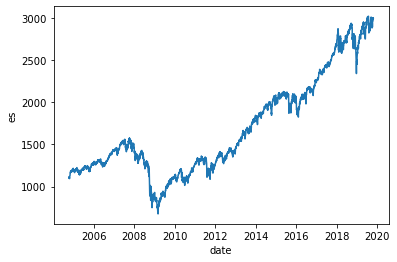

In [145]:
sns.lineplot(data=df, x='date', y="es")

<AxesSubplot:>

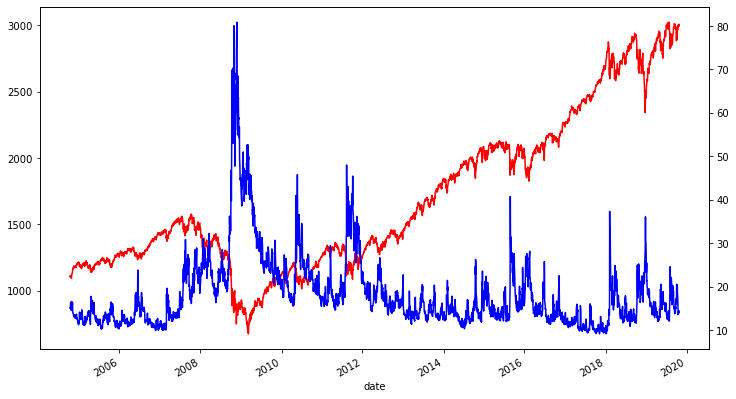

In [144]:
fig, ax = plt.subplots() 
df.es.plot(ax = ax, figsize=(12,7), color='red') 
df.vix.plot(ax = ax, secondary_y = True, color='blue') 


<AxesSubplot:>

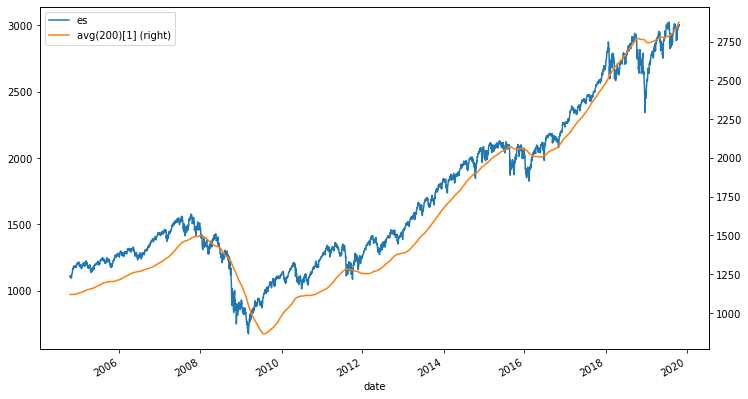

In [106]:
fig, ax = plt.subplots() 
df.plot(y = 'es', ax = ax, figsize=(12,7)) 
df.plot(y = 'avg(200)[1]', ax = ax, secondary_y = True) 

## Attributes

In [12]:
### Data cleaning is already performed through Excel---
### Try to do de data cleaning through Python in case we have got spare time in the end

### Data cleaning steps
### Data was retrieved from esignal service (all but gold) and from https://www.kaggle.com/datasets/psycon/daily-gold-price-historical-data  for gold prices
### Step 1: Each symbol consist of a pair columns (Date,Close). We retrieve all information for each symbol separately\n",
### Step 2: Each symbol different dates (they belong to different Exchanges and trading activity and trading hours/holidays might be different)
### Step 3: Date format need to be changed from (DTYYYYMMDD) to ((MM/DD/YYYY). Date is not important for the project but it is to align the different symbols sets
### Step 4: Technical Indicators on the underlying (AVG(5),AVG(200) & RSI) must be calculated from underlying data (S&P500)
### Step 5: All symbols must be joined/grouped in a single DataFrame accoriding to Date\n",
### Step 6: Transform Data: We are not interested on actual values of S&P500 but on whether it ahs gone up or down. We get return and then a categorical value for it
###  Up: 1 ; Down: 0\n",
### Step 7: Features need to be transformed: We are typically more interested in knowing how other markets have changed (their daily return) than in actual quotes
###        Sometimes there is important information on actual values (i.e VIX or RSI). I case of AVG(200) we just want to know if we are in a long term upside regime (1 or not 0)
### Step 8: VERY, VERY IMPORTANT!!!! 
    ##        Features must belong to prior date. We want to predict if TOMORROW the market is going to go up with TODAY´s information. So we need to make sure that all features information
    ##        has 1 day-lag (For each date , we have S&P500 return (up or down) for the day and features values must belong to yesterdays activity)

## 3. EDA

### 3.1 Stylized Facts

#### Stylized facts is like a specific EDA for asset returns time series. Asset returns typically show some statistical properties that do not appear in other areas
#### It is important to know them in order to build models

<br>

#### 0.-   S&P500 Returns
***

Text(0.5, 0, 'Date')

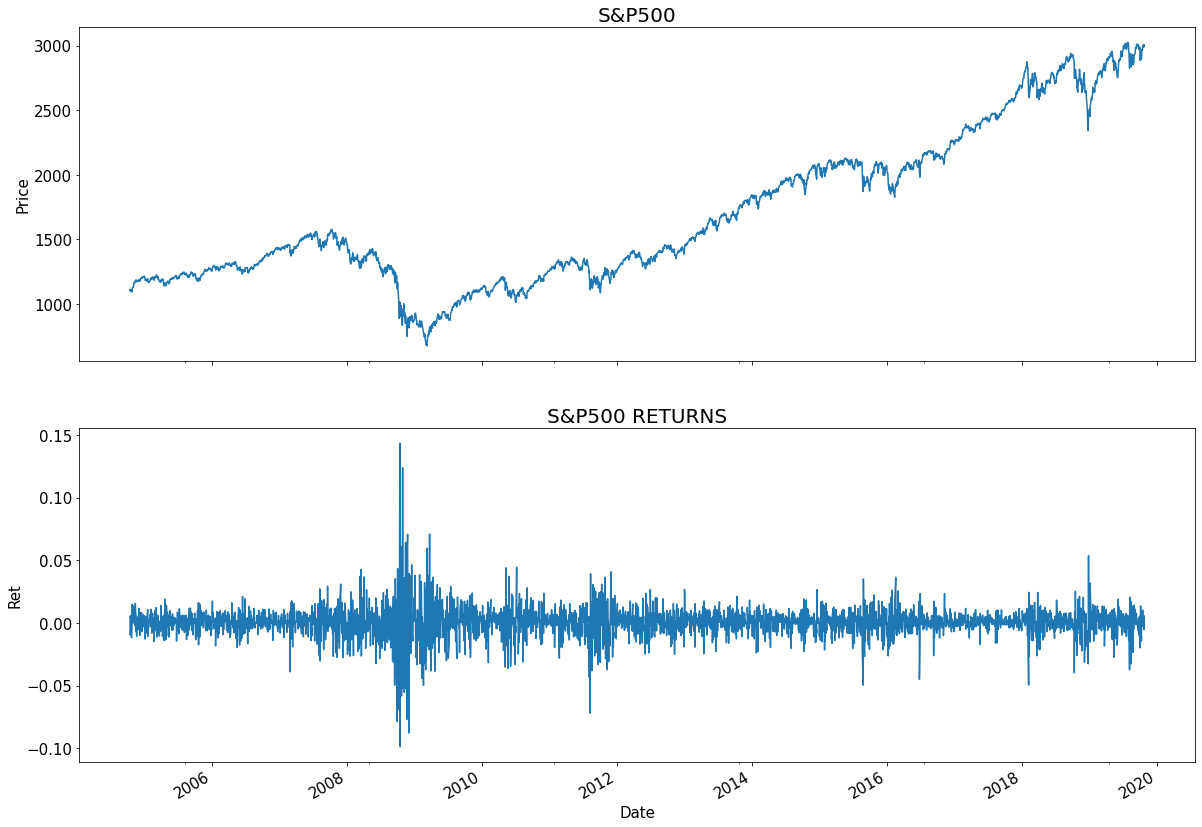

In [13]:
# Lets plot the S&P500 and its returns

fig,ax = plt.subplots(2,1,figsize=(20,15),sharex=True)

df.es.plot(ax=ax[0], fontsize=15)
ax[0].set()
ax[0].set_title("S&P500",fontsize=20)
ax[0].set_ylabel("Price",fontsize=15)

df["s&p500_ret"].plot(ax=ax[1], fontsize=15)
ax[1].set()
ax[1].set_title("S&P500 RETURNS",fontsize=20)
ax[1].set_ylabel("Ret",fontsize=15)

plt.xlabel('Date', fontsize=15)

<AxesSubplot:ylabel='Density'>

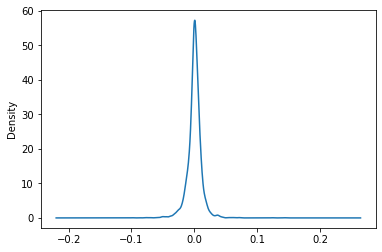

In [63]:
df['s&p500_ret'].plot(kind='kde')

<br>

#### 1.- Gaussian Returns?
***

In [14]:
ret = df['s&p500_ret']
rng =  np.linspace(min(ret),max(ret),num=1000)
mu = ret.mean()
sigma = ret.std()
norm_pdf = stats.norm.pdf(rng,loc=mu,scale=sigma)

In [15]:
# We plot the histogram & QQplot

Text(0.5, 1.0, 'Q-Q plot')

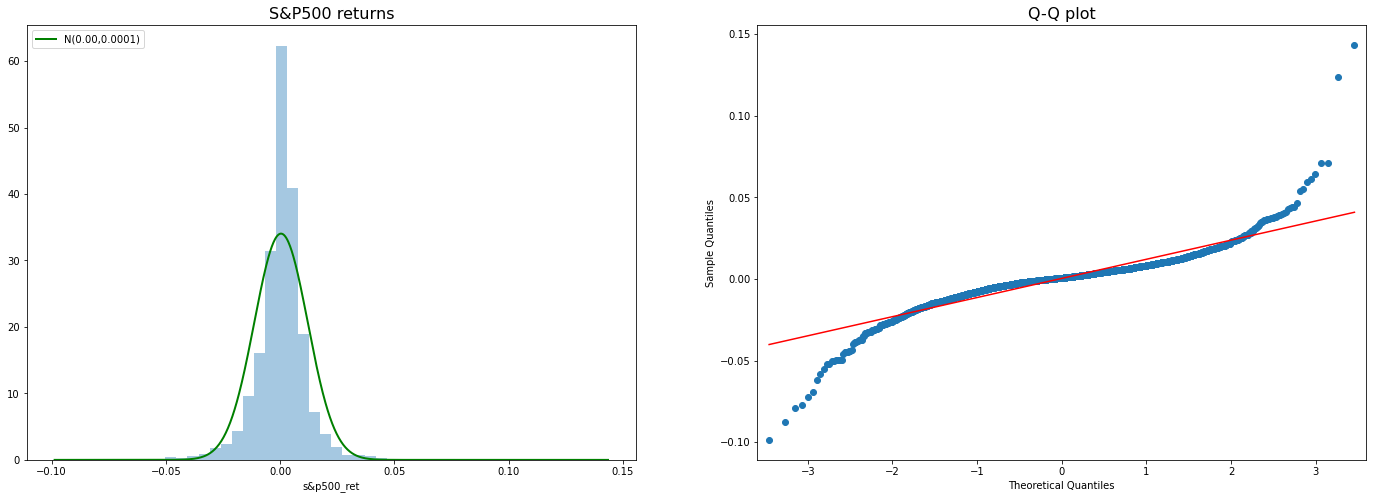

In [16]:
fig,ax = plt.subplots(1,2,figsize=(24,8))

# Histogram (subplot1):
sns.distplot(ret, kde=False,norm_hist=True,ax=ax[0])
ax[0].set_title("S&P500 returns",fontsize=16)
ax[0].plot(rng,norm_pdf,"g",lw=2,label=f'N({mu:.2f},{sigma**2:.4f})')
ax[0].legend(loc="upper left")

## Q-Q plot 
qq = sm.qqplot(ret.values,line='s',ax=ax[1])
ax[1].set_title('Q-Q plot',fontsize=16)

In [17]:
# Q-Qplot is clear, returns are not normally distributed. Fat tails

In [18]:
# Some analysis 
ret.describe()

count    3665.000000
mean        0.000349
std         0.011720
min        -0.098728
25%        -0.003983
50%         0.000668
75%         0.005487
max         0.143460
Name: s&p500_ret, dtype: float64

In [19]:
#Skewness and kurtosis of S&P500 returns. Jarque Bera test confirms returns do not follow a Normal distribution
print("Skewness:",ret.skew())
print("Kurtosis:",ret.kurtosis())
print(stats.jarque_bera(ret))

Skewness: 0.1473072248513847
Kurtosis: 16.679925310712534
Jarque_beraResult(statistic=42375.61480587448, pvalue=0.0)


In [20]:
# Accortding to mean, std, Skewness and kurtosis we can infere distribution is not normal. 
# Specifically we can see kurtosis as the main feature of this distribution : Fat tails
# Besides Jarque Bera normality test would make us reject distribution is normal at 99% level

# Therefore we can reject null hypothesis at the 99% confidence level since pvalue is 0.0 (<0.05). Returns on S&P500 are not normally distributed

<br>

#### Volatility clustering
***

Text(0, 0.5, 'Ret')

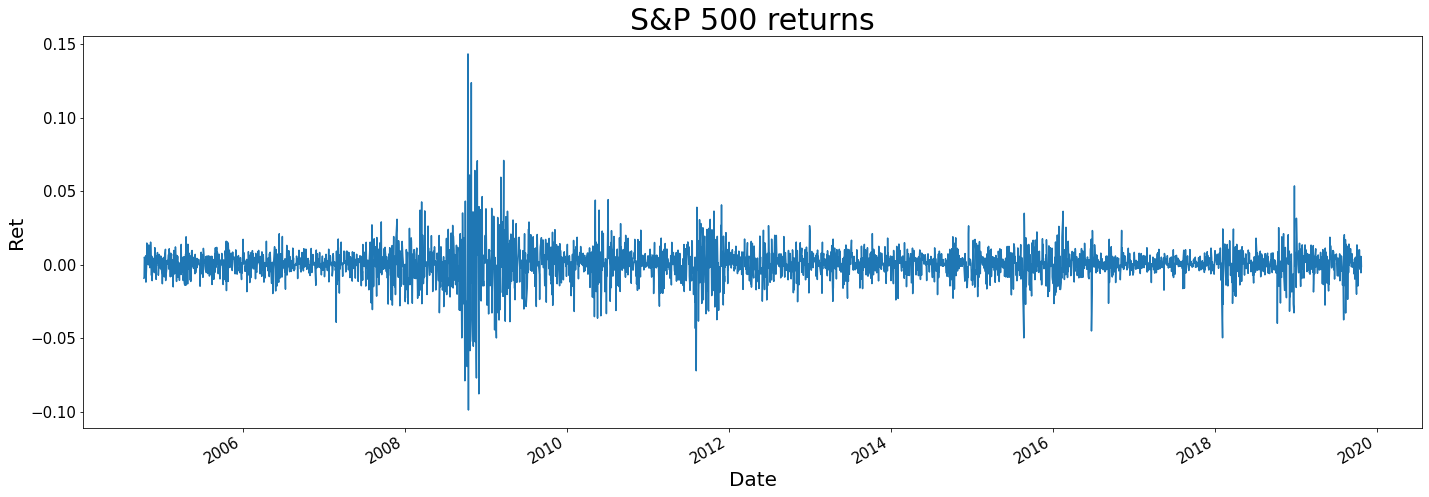

In [156]:
fig,ax = plt.subplots(1,1,figsize=(24,8))
ret.plot(fontsize=15)
plt.title('S&P 500 returns', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Ret', fontsize=20)


In [22]:
# Volatility seems to cluster (periods of high/low volatility in market returns tend to persist)....Conditional Heteroskedaticity

<br>

#### Autocorrelation in returns
***

In [23]:
# We now take a look to autocorrelation (How similar is a given time series to the lagged version of itself)
# Previous plot shows that returns tend to jump around zero and we see no persistent trends, this means little autocorrelation
# This are not good news for predicting future outcomes, there would be no way to make money if price follows a random walk
# Lets check this more visually through autocorrelation function (ACF)

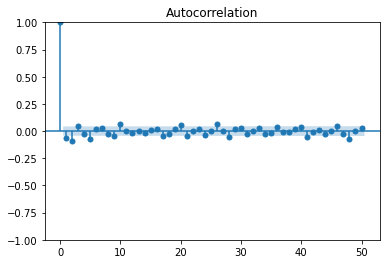

In [24]:
N_LAGS = 50
SIGNIFCANCE_LEVEL=0.01
acf = smt.graphics.plot_acf(ret,lags = N_LAGS,alpha=SIGNIFCANCE_LEVEL)

In [25]:
# Most of the values lie between the confidence interval. We can asume that there is no autocorrelation in the returns

<br>

#### Leverage effect
***

In [26]:
# Volatility measures as rolling standard deviations
df['moving_avg_std_252'] = df[["s&p500_ret"]].rolling(window=252).std()
df['moving_avg_std_21'] = df[["s&p500_ret"]].rolling(window=21).std()

<AxesSubplot:xlabel='date'>

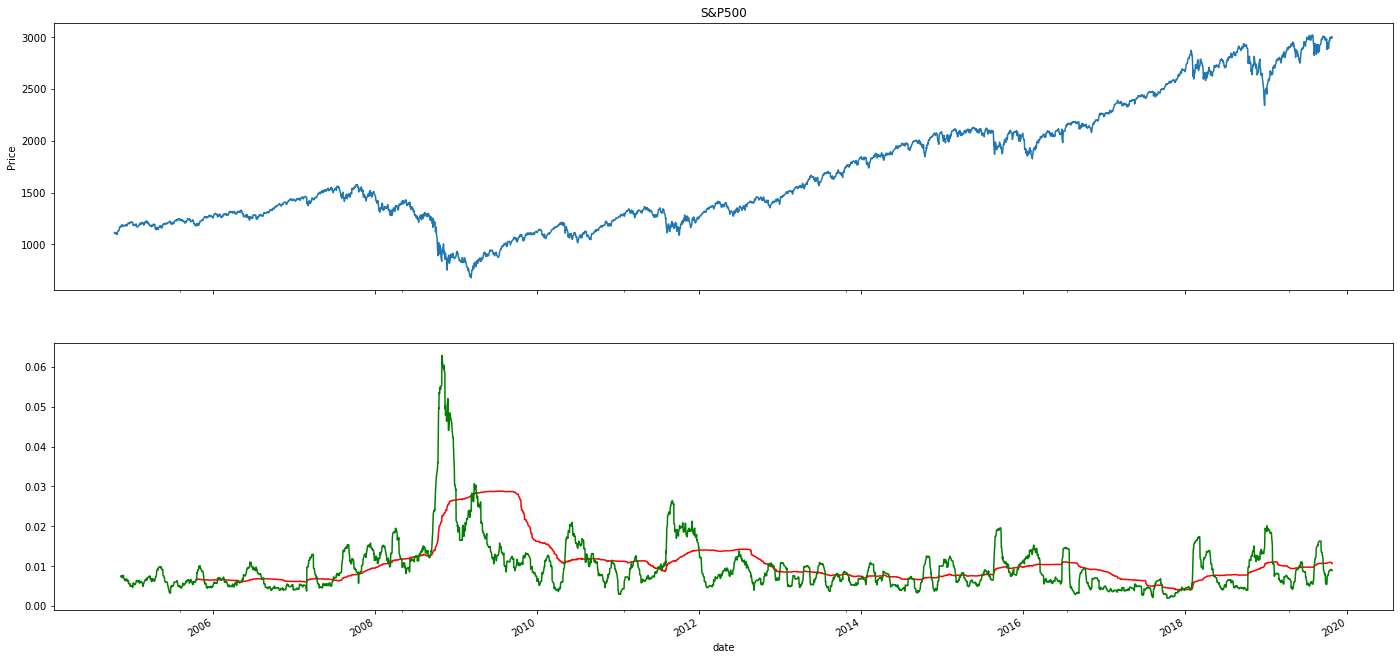

In [27]:
# Series

fig,ax = plt.subplots(2,1,figsize=(24,12),sharex=True)

df.es.plot(ax=ax[0])
ax[0].set(title='S&P500',ylabel = "Price")

df['moving_avg_std_252'].plot(ax=ax[1],color='r',label = 'Moving Volatility 252d')
df['moving_avg_std_21'].plot(ax=ax[1],color='g',label = 'Moving Volatility 21d')


In [28]:
# We see an important feature of financial time series: asset volatility is negatively correlated with returns.In this case we´re taking a look at realized volatility
# Asset returns volatility is typically considered as the "fear index", volatility increases when market drops, so it is typically negatively correlated to market returns

### 3.1 EDA other variables

In [49]:
col_start = df.iloc[:, 10:21]
col_end = df.iloc[:, 21:22]
new_df = pd.concat([col_start, col_end], axis=1)
new_df.head()

,change_avg(5),c_-_avg(200),rsi(2),vix,change_vix,change_eur-usd,change_10yr_ir,change_crude_oil,change_ng,change_gold,s&p500_ret,ret_label
date,,,,,,,,,,,,
2004-10-13,-0.004146,1,25.759886,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133,0
2004-10-14,-0.005492,0,8.580459,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094,0
2004-10-15,-0.005121,0,3.952030,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213,1
2004-10-18,-0.002372,0,43.141736,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608,1
2004-10-19,-0.002378,0,63.731022,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313,0


In [50]:
new_df.shape

(3665, 12)

In [51]:
new_df.dtypes

change_avg(5)       float64
c_-_avg(200)          int64
rsi(2)              float64
vix                 float64
change_vix          float64
change_eur-usd      float64
change_10yr_ir      float64
change_crude_oil    float64
change_ng           float64
change_gold         float64
s&p500_ret          float64
ret_label             int64
dtype: object

In [52]:
new_df.isna().sum()


change_avg(5)       0
c_-_avg(200)        0
rsi(2)              0
vix                 0
change_vix          0
change_eur-usd      0
change_10yr_ir      0
change_crude_oil    0
change_ng           0
change_gold         0
s&p500_ret          0
ret_label           0
dtype: int64

In [53]:
df_continuous = new_df.select_dtypes(include=['float64'])
df_continuous.head()

,change_avg(5),rsi(2),vix,change_vix,change_eur-usd,change_10yr_ir,change_crude_oil,change_ng,change_gold,s&p500_ret
date,,,,,,,,,,
2004-10-13,-0.004146,25.759886,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133
2004-10-14,-0.005492,8.580459,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094
2004-10-15,-0.005121,3.952030,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213
2004-10-18,-0.002372,43.141736,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608
2004-10-19,-0.002378,63.731022,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313


In [54]:
df_discrete = new_df.select_dtypes(include=['int64'])
df_discrete.head()

,c_-_avg(200),ret_label
date,,
2004-10-13,1,0
2004-10-14,0,0
2004-10-15,0,1
2004-10-18,0,1
2004-10-19,0,0


#### 3.1.1 Descriptive statistics for each feature

In [55]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
change_avg(5),3665.0,0.000289,0.004924,-0.043523,-0.001711,0.000642,0.002731,0.058952
c_-_avg(200),3665.0,0.777626,0.415898,0.000000,1.000000,1.000000,1.000000,1.000000
rsi(2),3665.0,56.457755,31.268778,0.058362,27.738700,61.240709,85.270117,99.978956
vix,3665.0,18.393866,8.831827,9.140000,12.900000,15.640000,20.950000,80.860000
change_vix,3665.0,0.002684,0.078048,-0.295726,-0.040141,-0.005807,0.034119,1.155979
change_eur-usd,3665.0,-0.000014,0.006028,-0.029003,-0.003424,0.000043,0.003297,0.035879
change_10yr_ir,3665.0,-0.000037,0.003809,-0.033092,-0.002249,-0.000123,0.002107,0.029346
change_crude_oil,3665.0,0.000258,0.023196,-0.121343,-0.012209,0.000593,0.012791,0.234392
change_ng,3665.0,0.000163,0.031783,-0.168408,-0.017979,-0.001199,0.016170,0.271750
change_gold,3665.0,0.000425,0.011544,-0.093446,-0.004953,0.000402,0.006364,0.089686


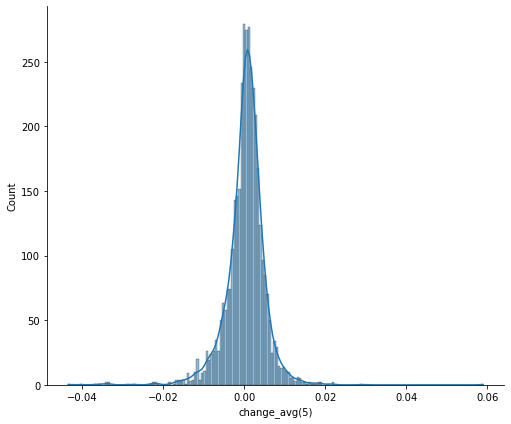

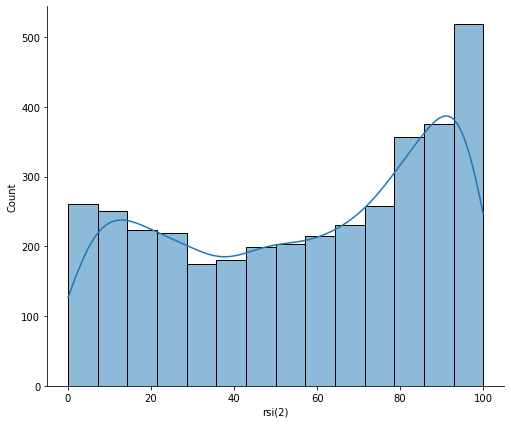

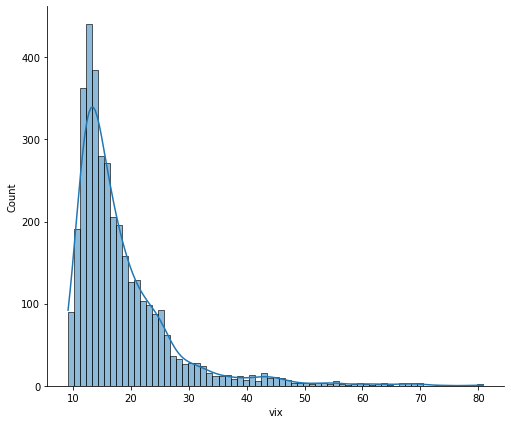

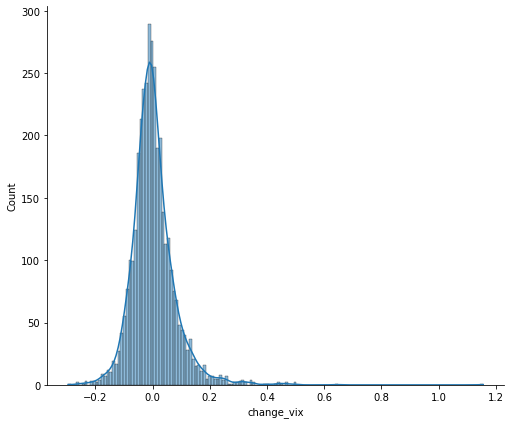

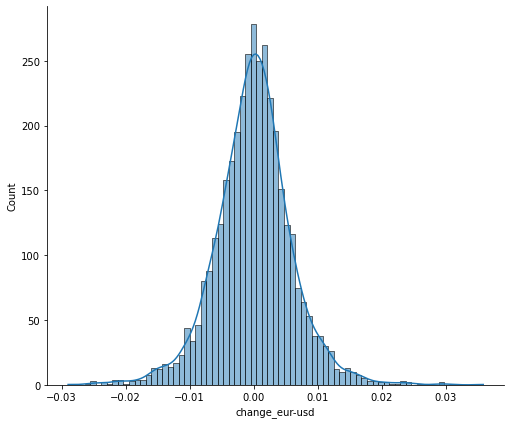

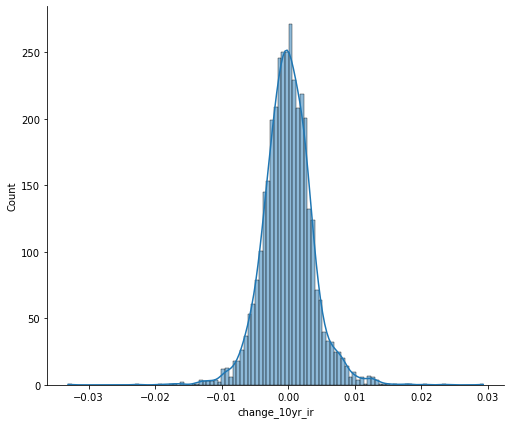

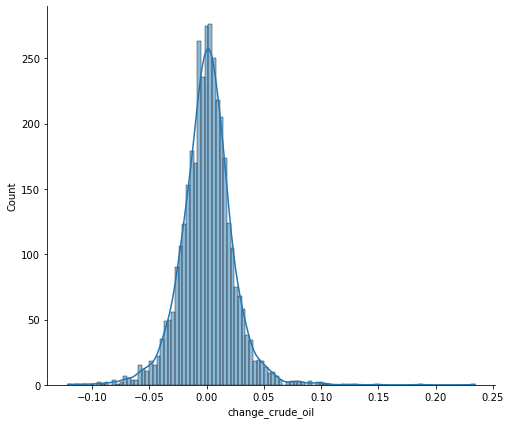

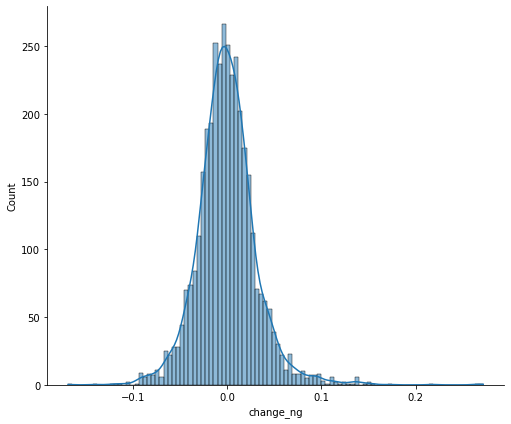

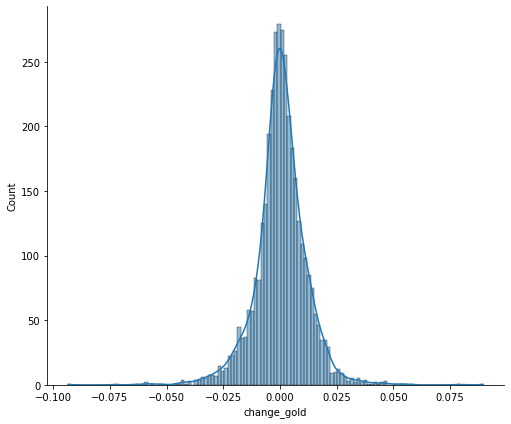

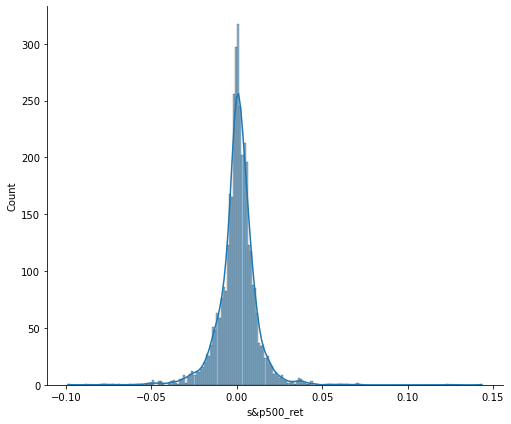

In [158]:
# Display all the plot for the continuous features.
for col in df_continuous:
    sns.displot(data=df_continuous, x= df_continuous[col], kde = True, height=6, aspect=1.2)
    plt.show()

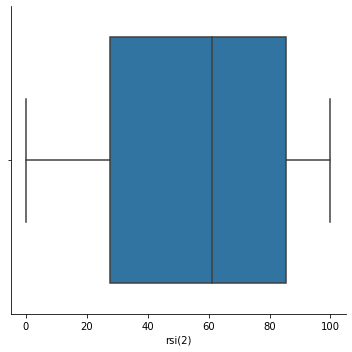

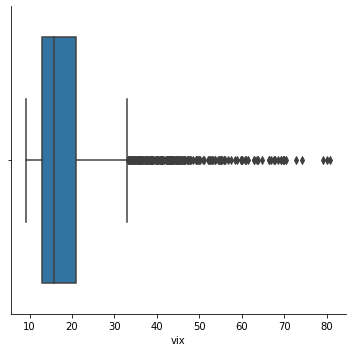

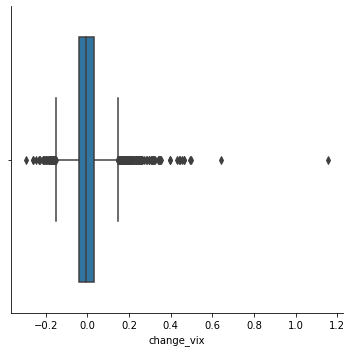

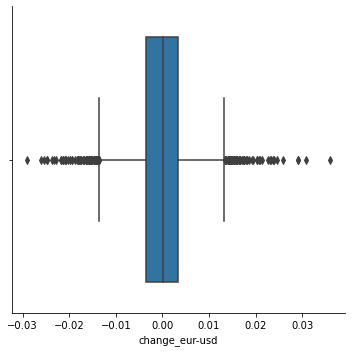

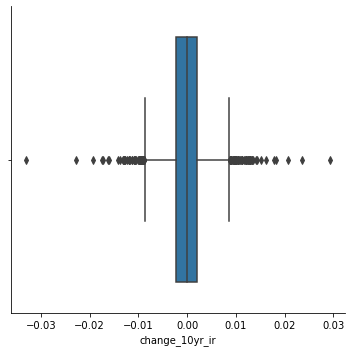

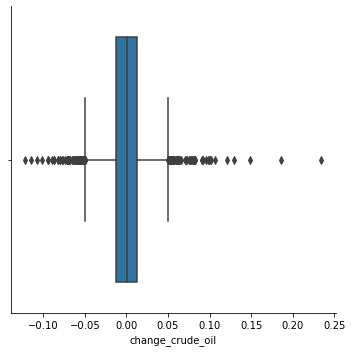

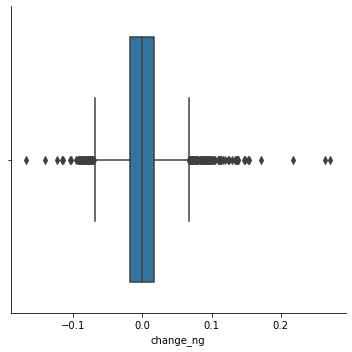

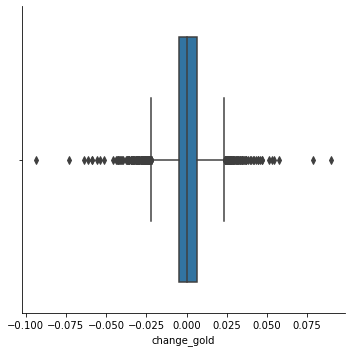

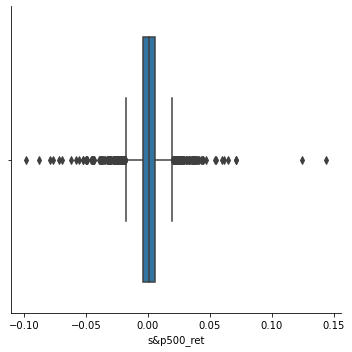

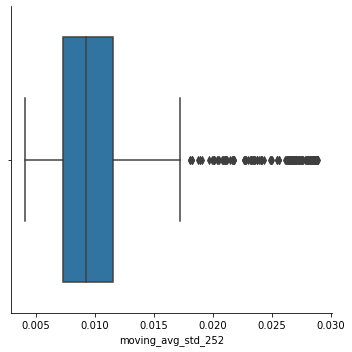

In [37]:
# Looking for the outliers.
for col in df_continuous:
    sns.catplot(data=df_continuous, x= col, kind="box")
    plt.show()

#### 3.1.2 Bivariate analysis

In [38]:
#sns.pairplot(new_df)

#### 3.1.3 Multicolinearity between the features 

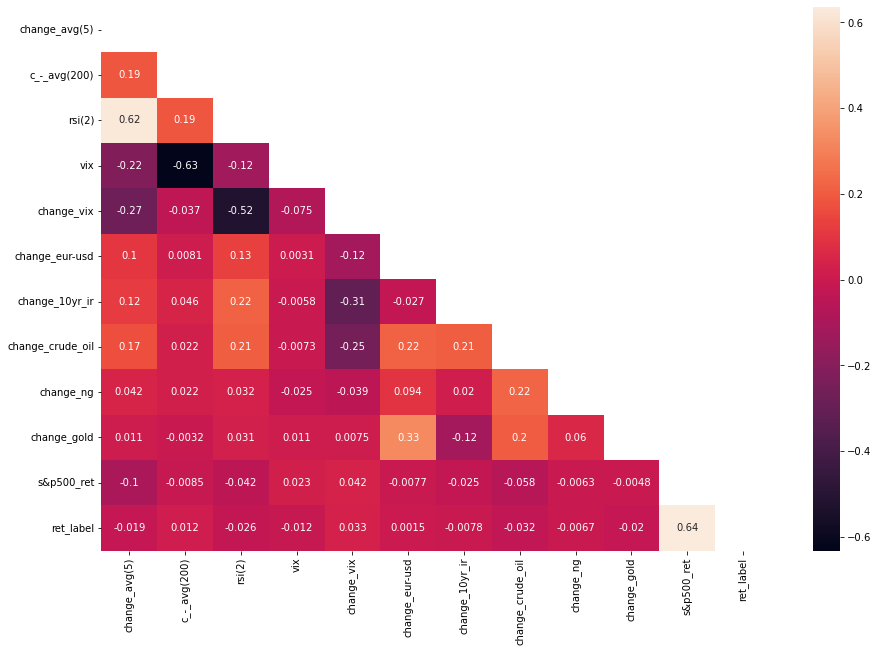

In [57]:
correlations = new_df.corr()      
mask = np.zeros_like(correlations)                
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))          
ax = sns.heatmap(correlations, mask = mask, annot = True)
plt.show()

#### 3.1.4 Looking the dicrete variables

<AxesSubplot:xlabel='ret_label', ylabel='count'>

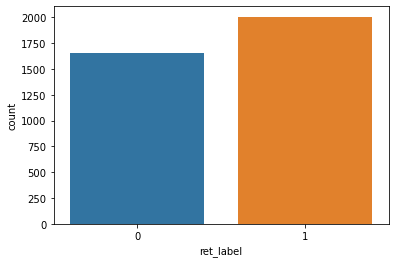

In [58]:
sns.countplot(x="ret_label", data=new_df)

In [59]:
new_df.ret_label.value_counts(normalize=True)


1    0.54734
0    0.45266
Name: ret_label, dtype: float64

<AxesSubplot:xlabel='c_-_avg(200)', ylabel='count'>

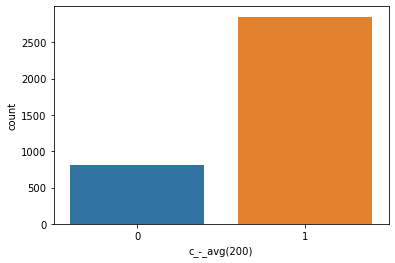

In [60]:
sns.countplot(x="c_-_avg(200)", data=new_df)

In [43]:
new_df['c_-_avg(200)'].value_counts(normalize=True)

1    0.777626
0    0.222374
Name: c_-_avg(200), dtype: float64

### 4. Feature Selection

In [61]:
# We would like to have as few features as possible to avoid overfitting (Curse of Dimensionality). The number of configurations grows exponentially as the #
# of features increases--> the number of configurations covered by an observation decreases ---> we learn less and less although we might be able to train the data perfectly
# We need to select useful features only
new_df.head()

,change_avg(5),c_-_avg(200),rsi(2),vix,change_vix,change_eur-usd,change_10yr_ir,change_crude_oil,change_ng,change_gold,s&p500_ret,ret_label
date,,,,,,,,,,,,
2004-10-13,-0.004146,1,25.759886,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133,0
2004-10-14,-0.005492,0,8.580459,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094,0
2004-10-15,-0.005121,0,3.952030,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213,1
2004-10-18,-0.002372,0,43.141736,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608,1
2004-10-19,-0.002378,0,63.731022,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313,0


change_avg(5)


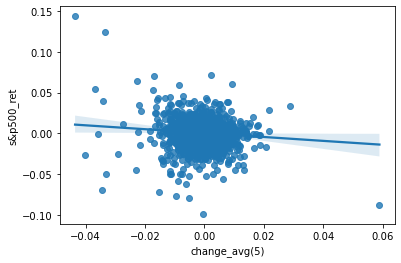

c_-_avg(200)


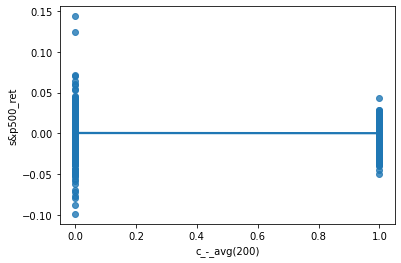

rsi(2)


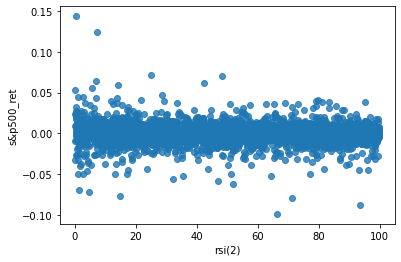

vix


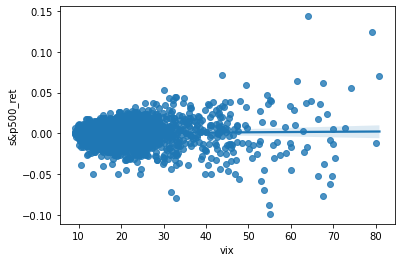

change_vix


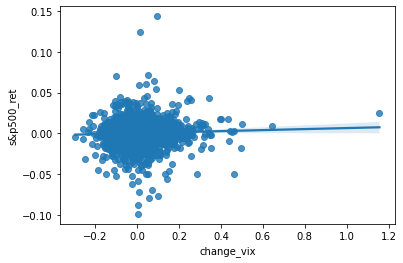

change_eur-usd


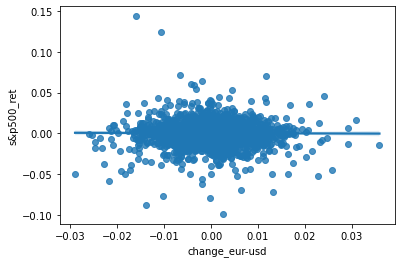

change_10yr_ir


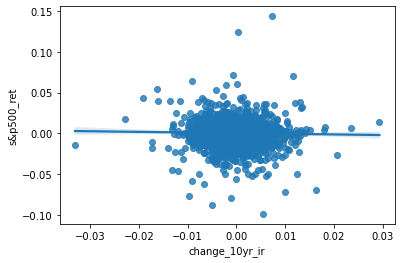

change_crude_oil


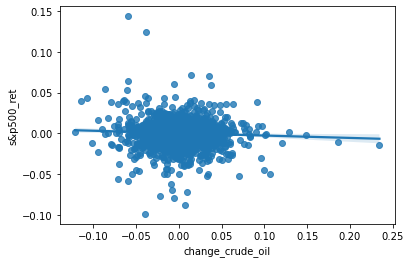

change_ng


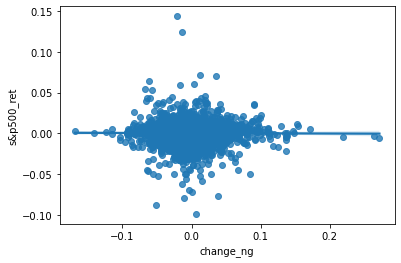

change_gold


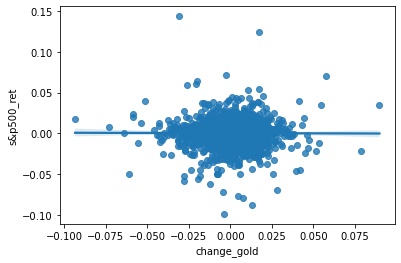

s&p500_ret


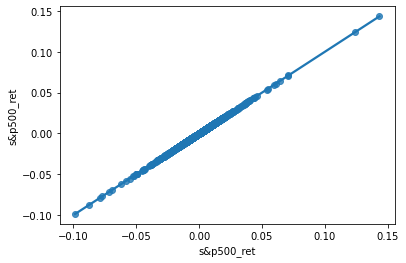

ret_label


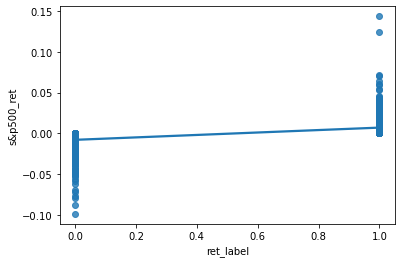

In [62]:
# list = ['Change AVG(5)', 'C - AVG(200)', 'RSI(2)', 'VIX', 'Change VIX','Change EUR-USD', 'Change 10YR_IR', 'Change CRUDE OIL', 'Change NG','Change GOLD', 'S&P500 RET', 'RET_LABEL']

for i in new_df:
    print(i)
    sns.regplot(x=i,y='s&p500_ret',data=new_df)
    plt.show()